## Data Science Question : Which is the best variable to predict the increase in positive cases in the United States?

## Importing Relevant Modules

In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# set dimesnions of the pondas dataframe here
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns',8)
pd.set_option('display.width',1000)

In [72]:
covid_data = pd.read_csv("all-states-history.csv") #reading csv file into pandas dataframe    

## Cleaning & restructuring of data

In [73]:
data = covid_data.loc[4648:17415] # selecting time period to perform data analysis

In [75]:
data

,date,state,death,deathConfirmed,...,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
4648,14/12/2020,AK,176.0,176.0,...,NaN,0,1147560.0,4462
4649,14/12/2020,AL,4102.0,3624.0,...,1723669.0,27230,NaN,0
4650,14/12/2020,AR,2990.0,2656.0,...,NaN,0,1866199.0,10495
4651,14/12/2020,AS,0.0,NaN,...,NaN,0,2140.0,0
4652,14/12/2020,AZ,7358.0,6782.0,...,2531222.0,18526,4344693.0,38805
...,...,...,...,...,...,...,...,...,...
17411,1/5/2020,VT,50.0,NaN,...,13972.0,537,17899.0,1048
17412,1/5/2020,WA,814.0,NaN,...,209827.0,4792,NaN,0
17413,1/5/2020,WI,327.0,NaN,...,NaN,0,NaN,0
17414,1/5/2020,WV,46.0,NaN,...,NaN,0,45723.0,2066


## Measuring the level of completeness for each variable
One of our criterias for a good predictor is the level of completeness of data. The level of completeness is measured by the number of non-null values. For some of the variables in the raw data, there are alot of missing values termed as "NaN". As such, we came up with a table that displays each variable and its respective number of  non-null values. We then proceed to extract and choose those variables that fulfills a certain level of completeness. In this case, we extract variables that have at least 60% of their data present. (we managed to narrow down to 17 variables). 

In [77]:
null_measurement = pd.DataFrame({"Variables": [], "Non-null values" : []})
for i in data.columns:
    if (i == "date" or  i == "state" or i == "positive" or i == "positiveScore"):
        continue
    length = len(data[data[i].isnull() == False])
    x = pd.DataFrame({"Variables":[i], "Non-null values":[length]})
    null_measurement = null_measurement.append(x)
null_measurement = null_measurement.reset_index()
null_measurement = null_measurement[["Variables", "Non-null values"]]
x = null_measurement.sort_values(by = "Non-null values", ascending = False)
x = x[x["Non-null values"] > 7660]
list_of_variables = list(x["Variables"])
x.drop(18, axis = 0, inplace = True)
x

,Variables,Non-null values
0,death,12768.0
7,hospitalizedIncrease,12768.0
34,totalTestsPeopleViralIncrease,12768.0
28,totalTestResultsIncrease,12768.0
27,totalTestResults,12768.0
26,totalTestEncountersViralIncrease,12768.0
11,negativeIncrease,12768.0
36,totalTestsViralIncrease,12768.0
2,deathIncrease,12768.0
6,hospitalizedCurrently,11736.0


In [ ]:
null_measurement = pd.DataFrame({"Variables": [], "Non-null values" : []})
for i in data.columns:
    if (i == "date" or  i == "state" or i == "positive" or i == "positiveScore"):
        continue
    length = len(data[data[i].isnull() == False])
    x = pd.DataFrame({"Variables":[i], "Non-null values":[length]})
    null_measurement = null_measurement.append(x)
null_measurement = null_measurement.reset_index()
null_measurement = null_measurement[["Variables", "Non-null values"]]
x = null_measurement.sort_values(by = "Non-null values", ascending = False)
x = x[x["Non-null values"] > 7660]

In [26]:
# After measuring the level of completeness, we have narrowed down the data to 16 variables to choose from to predict the increase in positive cases
list_of_var = list(x["Variables"])
print(list_of_var)

['death', 'hospitalizedIncrease', 'totalTestsPeopleViralIncrease', 'totalTestResultsIncrease', 'totalTestResults', 'totalTestEncountersViralIncrease', 'negativeIncrease', 'totalTestsViralIncrease', 'deathIncrease', 'hospitalizedCurrently', 'totalTestsViral', 'positiveCasesViral', 'hospitalizedCumulative', 'hospitalized', 'recovered', 'negative']


## Cleaning null values in each variable
Some of the chosen variables have some missing data/ Nan data. As shown earlier, a variable that is fully complete and have 0 null values should have 12768 values. However, some variables have certain null values since some states in the United States did not provide the relevant information for that variable. When performing anaysis to use the variable to predict the increase in positive cases, this might result in different number of data points between that variable and the increase in positive cases. Hence, we have to clean up the non null values in that variable. To do this, we construct a dataframe consisiting of that variable and the increase in positive cases ("positiveIncrease"), then we extract rows that contain only the non-null values of that variable. we do the same for all the other variables that we have chosen. This step is important when performing linear regression analysis in our later steps.

In [81]:
# removing null values
variables = {} #storing the dataframes into a dictionary. Each dataframe will have the predictor & response
for i in list_of_var:
    variables[i] = pd.DataFrame(data[[i, "positiveIncrease"]])
    x = variables[i] #dataframe
    variables[i] = x[x[i].isnull() == False]
variables["death"]

,death,positiveIncrease
4648,176.0,422
4649,4102.0,2264
4650,2990.0,1805
4651,0.0,0
4652,7358.0,11806
...,...,...
17411,50.0,13
17412,814.0,328
17413,327.0,498
17414,46.0,18


In [79]:
variables = {} #storing the dataframes into a dictionary. Each dataframe will have the predictor & response 
for i in list_of_var:
    variables[i] = pd.DataFrame(data[[i, "positiveIncrease"]])
    x = variables[i] #dataframe
    variables[i] = x[x[i].isnull() == False]


## Exploratory Analysis

In [28]:
corr_matrix = data[list_of_variables].corr()
corr_matrix

,death,hospitalizedIncrease,totalTestsPeopleViralIncrease,totalTestResultsIncrease,totalTestResults,totalTestEncountersViralIncrease,negativeIncrease,positiveIncrease,totalTestsViralIncrease,deathIncrease,hospitalizedCurrently,totalTestsViral,positiveCasesViral,hospitalizedCumulative,hospitalized,recovered,negative
death,1.000000,0.075969,0.038148,0.738797,0.796012,0.548748,0.178700,0.477345,0.359870,0.448176,0.531977,0.812078,0.831155,0.940645,0.940645,0.809236,0.846537
hospitalizedIncrease,0.075969,1.000000,0.033591,0.058564,0.047286,0.062822,0.078693,0.104027,0.039360,0.134053,0.112903,0.051869,0.073319,0.101209,0.101209,0.074397,0.153052
totalTestsPeopleViralIncrease,0.038148,0.033591,1.000000,0.054309,0.045235,0.103446,0.118471,0.072813,0.025737,0.066645,0.050197,0.053627,0.056323,0.055865,0.055865,0.048912,0.277356
totalTestResultsIncrease,0.738797,0.058564,0.054309,1.000000,0.885892,0.523096,0.182223,0.708855,0.599973,0.455053,0.650937,0.868229,0.769623,0.749963,0.749963,0.617786,0.768991
totalTestResults,0.796012,0.047286,0.045235,0.885892,1.000000,0.494591,0.106159,0.684751,0.514329,0.436273,0.613108,0.999263,0.925341,0.796026,0.796026,0.839570,0.945732
totalTestEncountersViralIncrease,0.548748,0.062822,0.103446,0.523096,0.494591,1.000000,0.155548,0.270555,0.006839,0.191954,0.202859,0.253291,0.307990,0.727296,0.727296,0.197388,0.559625
negativeIncrease,0.178700,0.078693,0.118471,0.182223,0.106159,0.155548,1.000000,0.136246,0.166121,0.109565,0.090905,0.118075,0.177522,0.132659,0.132659,0.135160,0.644600
positiveIncrease,0.477345,0.104027,0.072813,0.708855,0.684751,0.270555,0.136246,1.000000,0.495357,0.594170,0.789581,0.725362,0.742590,0.406027,0.406027,0.712087,0.653862
totalTestsViralIncrease,0.359870,0.039360,0.025737,0.599973,0.514329,0.006839,0.166121,0.495357,1.000000,0.328870,0.491522,0.656818,0.532631,0.204742,0.204742,0.320356,0.324845
deathIncrease,0.448176,0.134053,0.066645,0.455053,0.436273,0.191954,0.109565,0.594170,0.328870,1.000000,0.742436,0.528911,0.593567,0.381760,0.381760,0.634985,0.432640


### Heatmap visualisation to show the correlation values of the 16 variables

<AxesSubplot:>

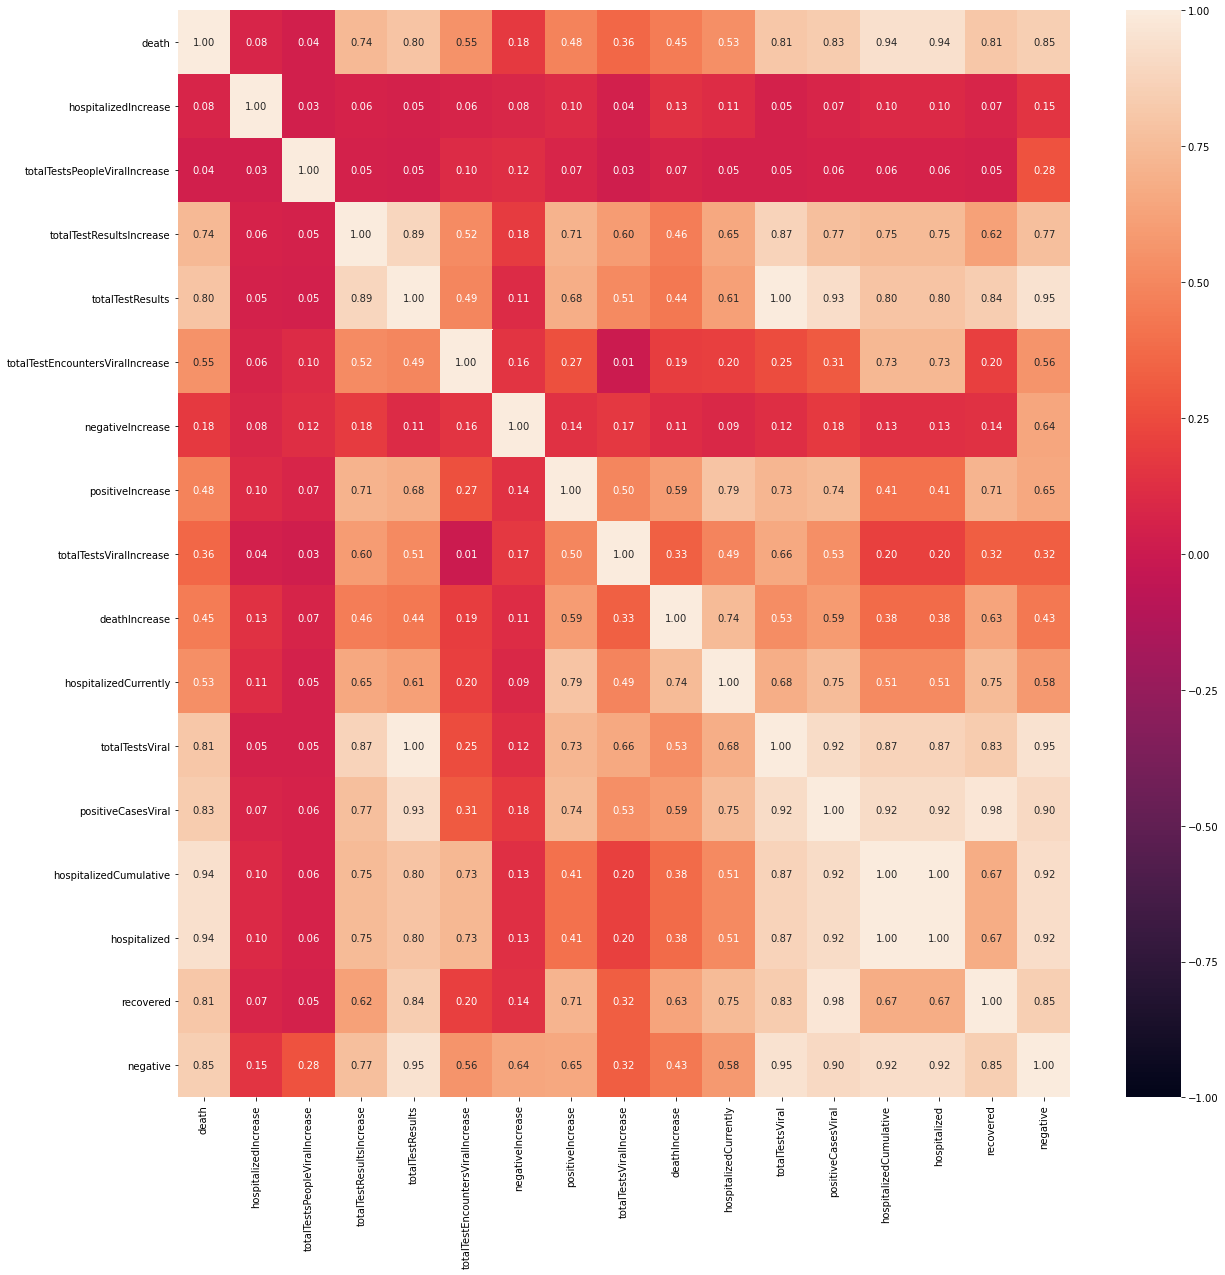

In [29]:
# heatmap for top 10 variables (correlation_values)
f = plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, vmin = -1, vmax = 1, annot = True, fmt = ".2f")

<Figure size 1440x1440 with 0 Axes>

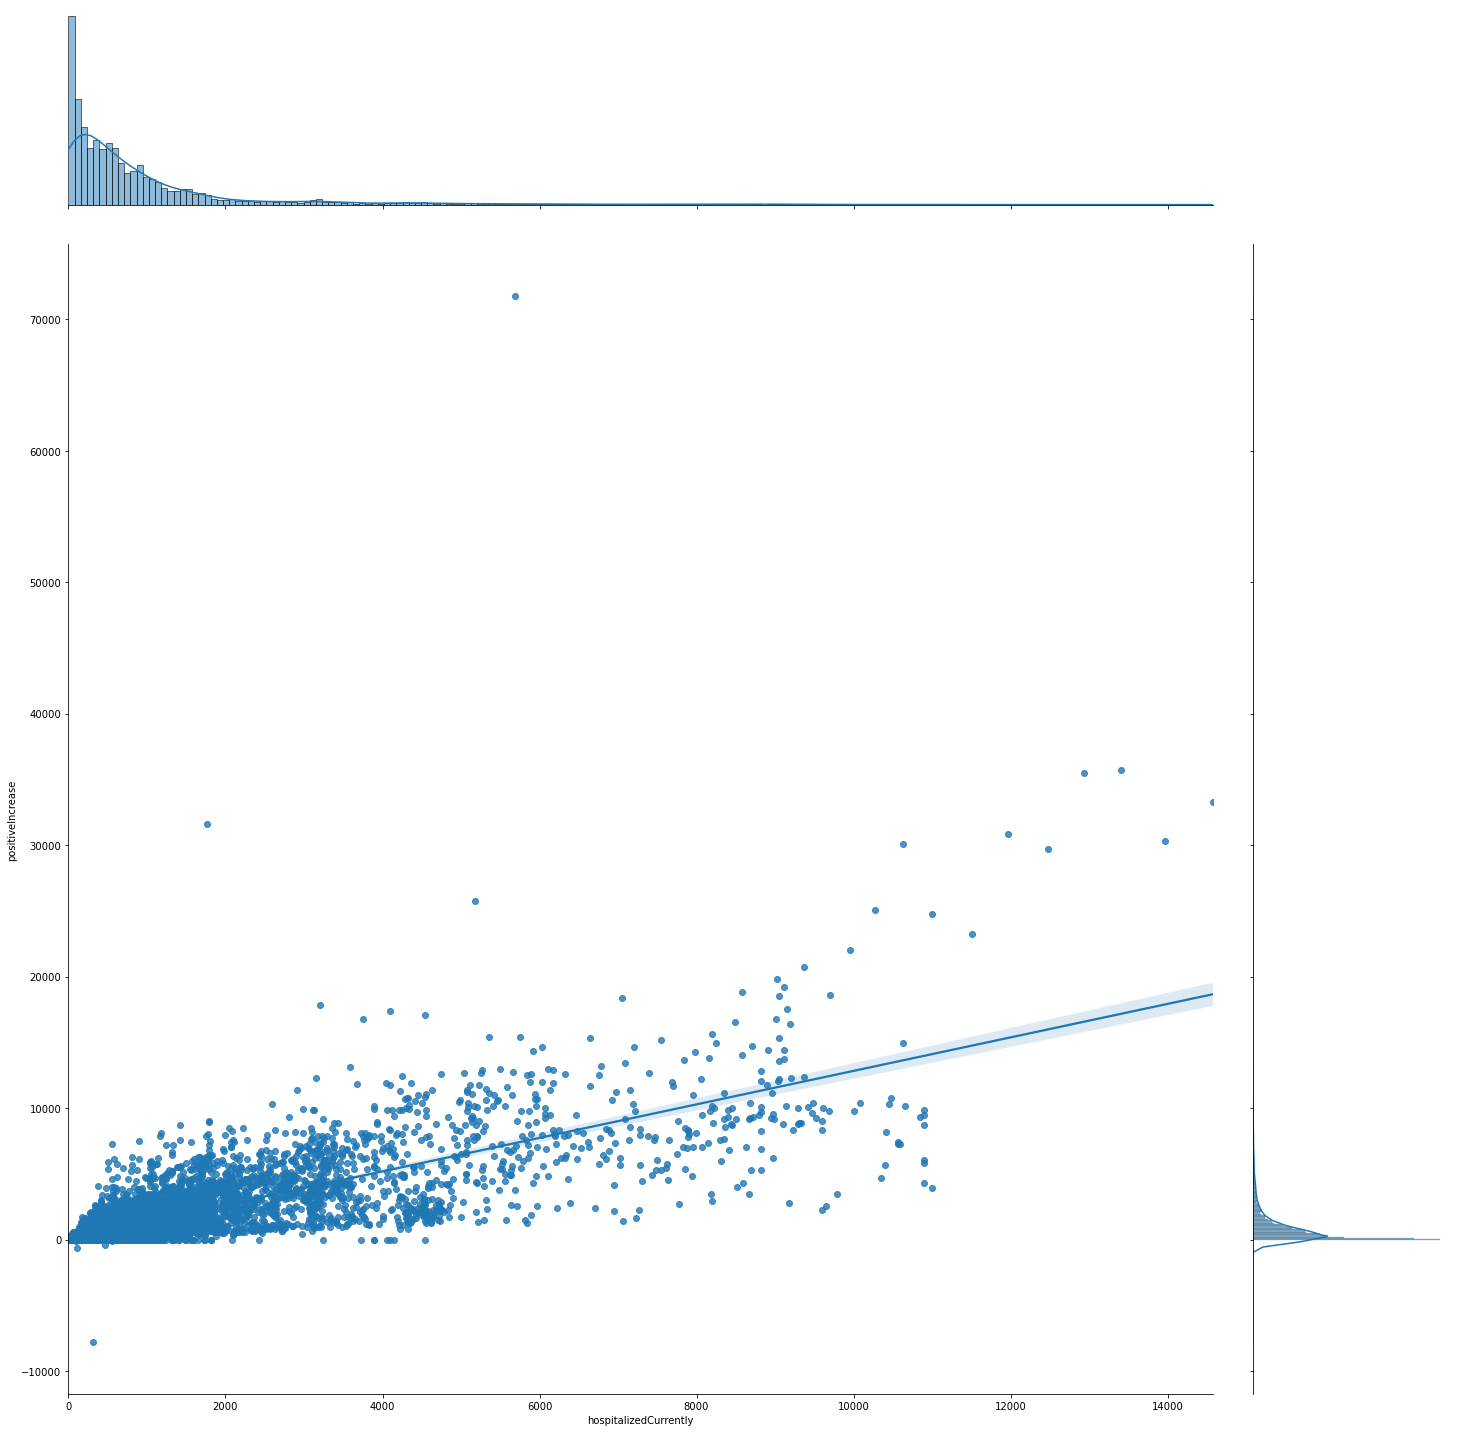

In [30]:
f = plt.figure(figsize=(20,20))
sns.jointplot(data = data, x = data["hospitalizedCurrently"], y =data["positiveIncrease"], kind = "reg", height = 20)

### Selecting variables based on correlation values
A good correlation value may mean that the variable might be useful in helping us to predict the number of increase in positive cases. Hence below, we sorted the correlation values between positiveIncrease and the 16 variables. We will chooose variables that have a correlation of more than 0.7 (the top 5)

In [31]:
corr_matrix["positiveIncrease"].sort_values(ascending = False)

positiveIncrease                    1.000000
hospitalizedCurrently               0.789581
positiveCasesViral                  0.742590
totalTestsViral                     0.725362
recovered                           0.712087
totalTestResultsIncrease            0.708855
totalTestResults                    0.684751
negative                            0.653862
deathIncrease                       0.594170
totalTestsViralIncrease             0.495357
death                               0.477345
hospitalizedCumulative              0.406027
hospitalized                        0.406027
totalTestEncountersViralIncrease    0.270555
negativeIncrease                    0.136246
hospitalizedIncrease                0.104027
totalTestsPeopleViralIncrease       0.072813
Name: positiveIncrease, dtype: float64

In [32]:
list_of_variables = ["positiveIncrease","hospitalizedCurrently","positiveCasesViral","totalTestsViral","recovered", "totalTestResultsIncrease"]

In [33]:
corr_matrix = data[list_of_variables].corr() #values above 0.9
corr_matrix

,positiveIncrease,hospitalizedCurrently,positiveCasesViral,totalTestsViral,recovered,totalTestResultsIncrease
positiveIncrease,1.000000,0.789581,0.742590,0.725362,0.712087,0.708855
hospitalizedCurrently,0.789581,1.000000,0.750498,0.682050,0.746690,0.650937
positiveCasesViral,0.742590,0.750498,1.000000,0.921852,0.975142,0.769623
totalTestsViral,0.725362,0.682050,0.921852,1.000000,0.831147,0.868229
recovered,0.712087,0.746690,0.975142,0.831147,1.000000,0.617786
totalTestResultsIncrease,0.708855,0.650937,0.769623,0.868229,0.617786,1.000000


### Pairplot Visualisation to show the spread and data points of the variables

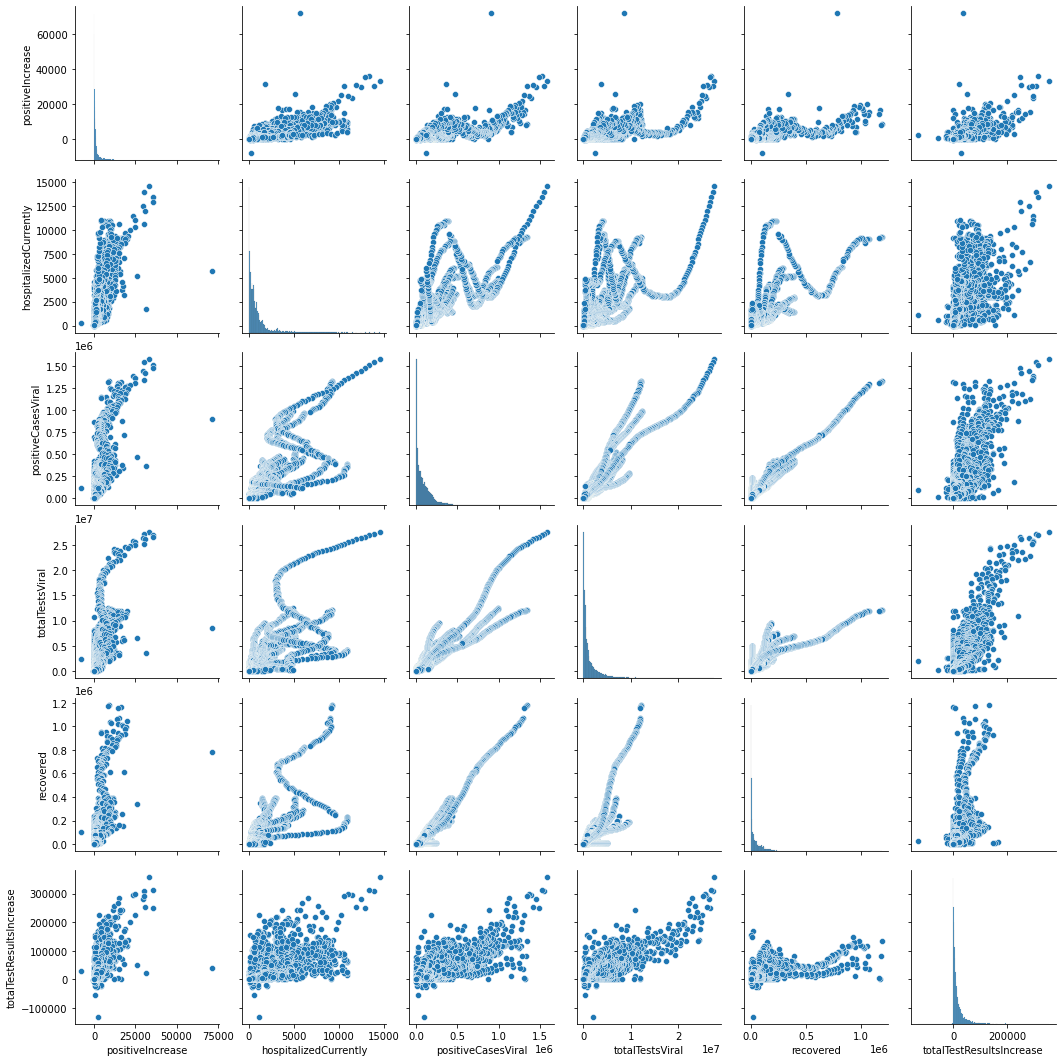

In [34]:
# pairplot to show the selected 4 variables
sns.pairplot(data[list_of_variables])

# Linear Regression Analysis


We will now perform linear regression analysis on the 5 variables that we have chosen. The 5 variables used to predict positive cases are "positiveIncrease","hospitalizedCurrently","positiveCasesViral","totalTestsViral","recovered", "totalTestResultsIncrease". We will do the regression model on each variable to predict positiveIncrease. Then, we choose the best model based on the explained variance values. The higher the explained variance value, the better the model is for predicting positiveIncrease.

Intercept of Regression 	: b =  [81.91210849]
Coefficients of Regression 	: a =  [[1.29029664]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.6125988527327002
Mean Squared Error (MSE) 	: 2219547.1599328527

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.663252223368294
Mean Squared Error (MSE) 	: 1554184.814674233



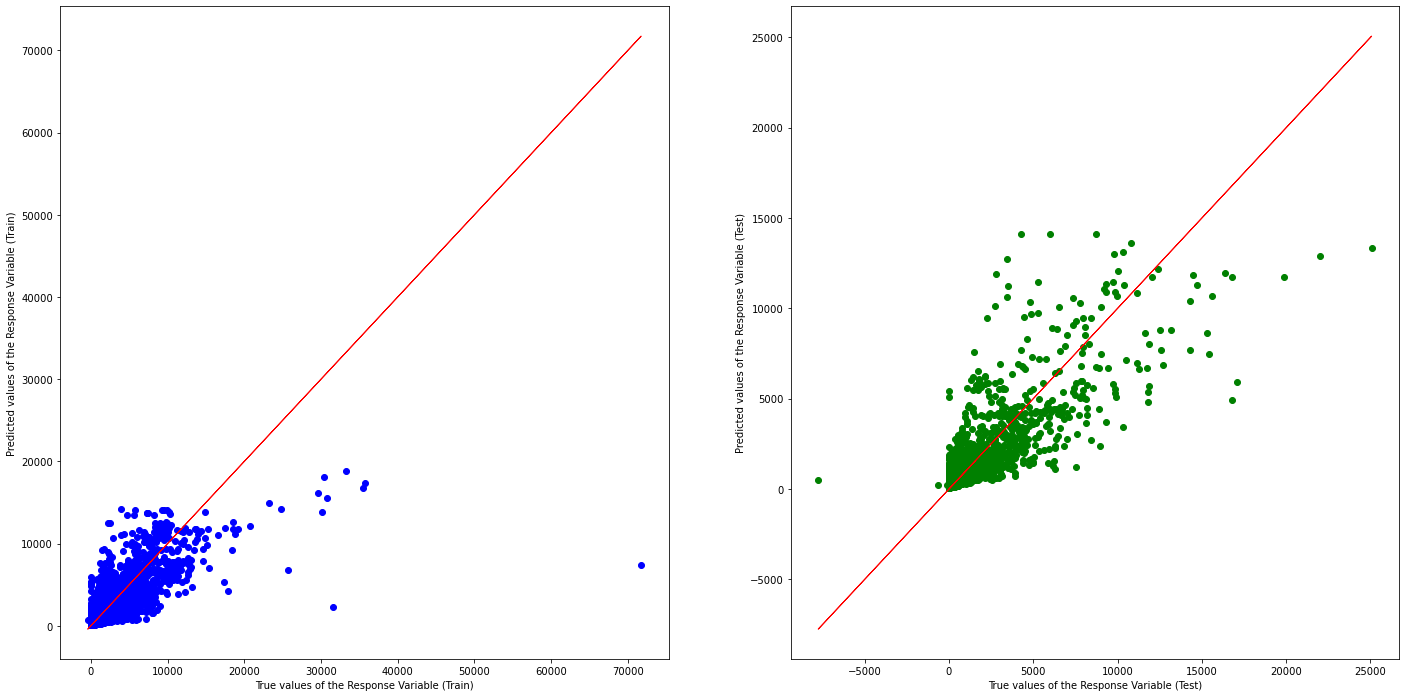

In [37]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

positiveincrease = pd.DataFrame((variables["hospitalizedCurrently"])["positiveIncrease"]) # Response
hospcurrently = pd.DataFrame((variables['hospitalizedCurrently'])["hospitalizedCurrently"]) #predictor      

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(hospcurrently, positiveincrease, test_size = 0.25)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Predict Total values corresponding to HP
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

Intercept of Regression 	: b =  [158.31296269]
Coefficients of Regression 	: a =  [[0.01018659]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.549778504751421
Mean Squared Error (MSE) 	: 2744395.7420030762

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.5564294747131269
Mean Squared Error (MSE) 	: 2117305.927069915



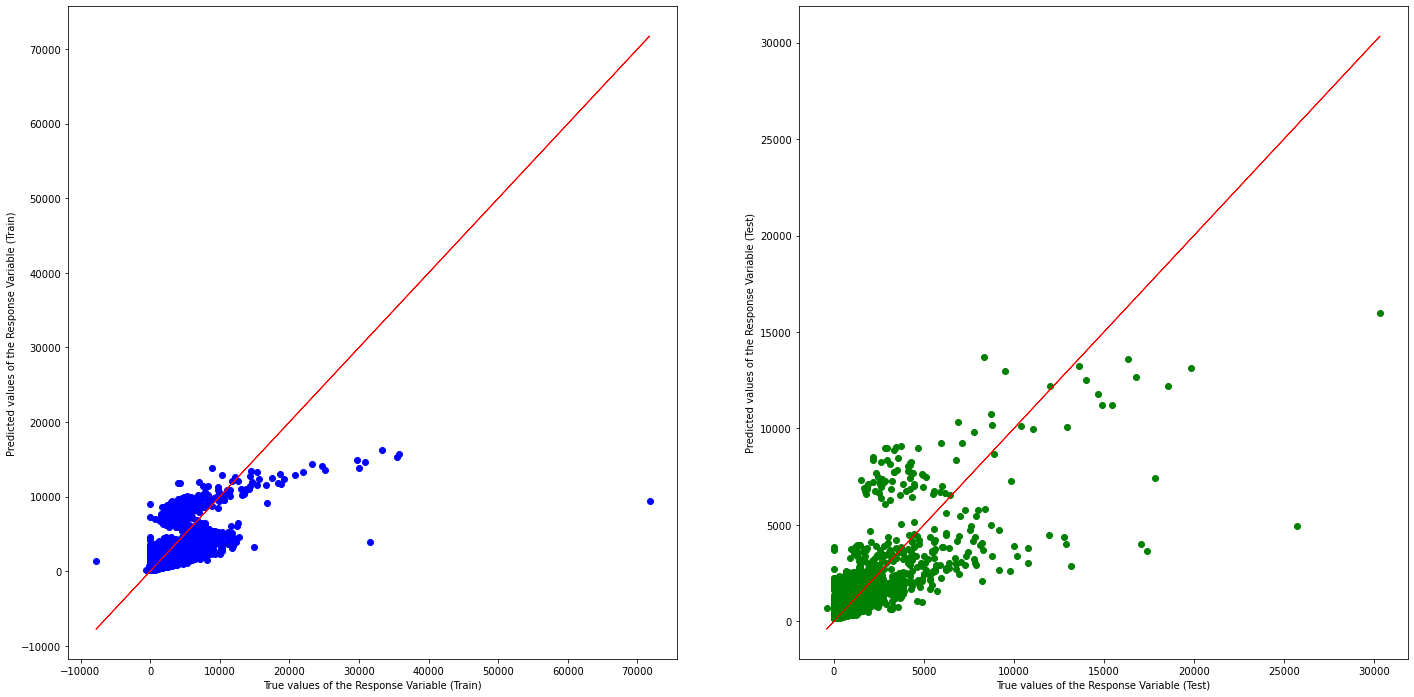

In [16]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

positiveincrease = pd.DataFrame((variables["positiveCasesViral"])["positiveIncrease"]) # Response
poscasesviral = pd.DataFrame((variables['positiveCasesViral'])["positiveCasesViral"]) #predictor      

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(poscasesviral, positiveincrease, test_size = 0.25)

# Linear Regression using Train Data
linreg2 = LinearRegression()         # create the linear regression object
linreg2.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg2.intercept_)
print('Coefficients of Regression \t: a = ', linreg2.coef_)
print()

# Predict Total values corresponding to HP
y_train_pred = linreg2.predict(X_train)
y_test_pred = linreg2.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg2.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg2.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

Intercept of Regression 	: b =  [172.40254562]
Coefficients of Regression 	: a =  [[0.0006783]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.5320630201049914
Mean Squared Error (MSE) 	: 2943214.9122662386

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.5063346434213961
Mean Squared Error (MSE) 	: 2931160.912541665



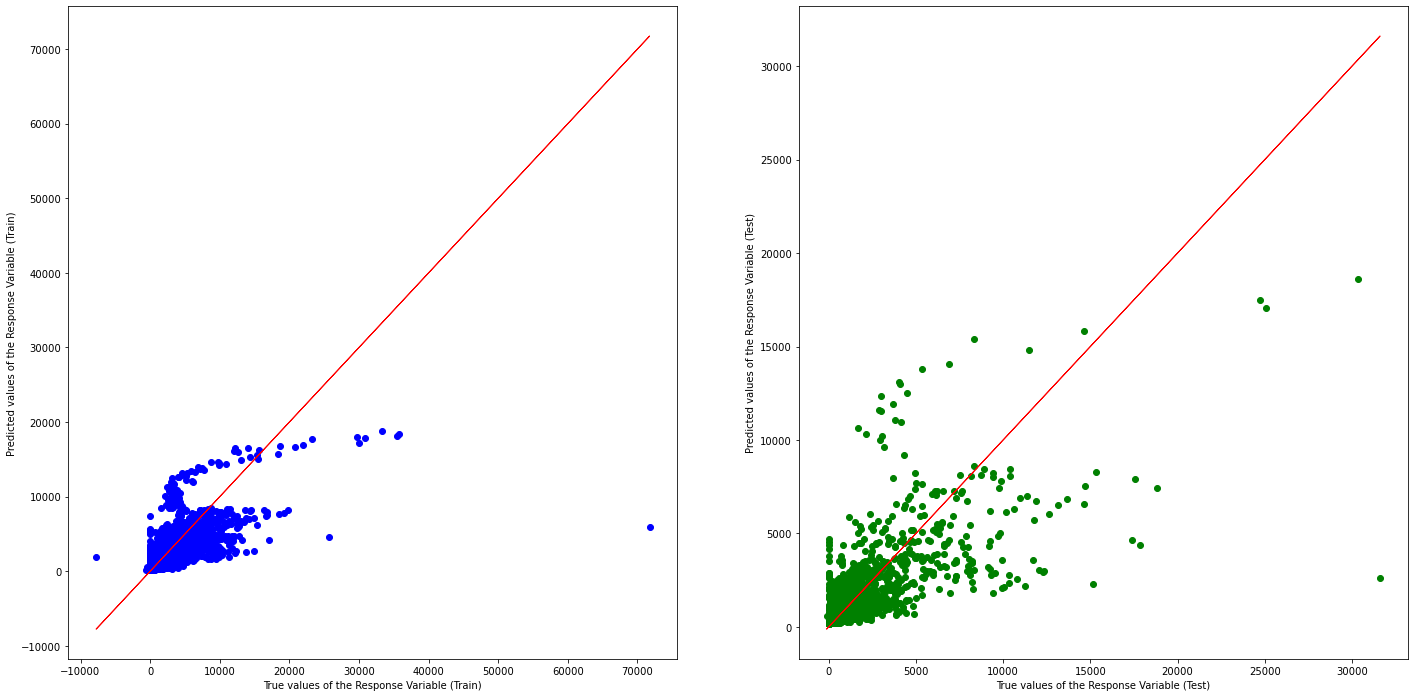

In [17]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

positiveincrease = pd.DataFrame((variables["totalTestsViral"])["positiveIncrease"]) # Response
totaltestsviral = pd.DataFrame((variables['totalTestsViral'])["totalTestsViral"]) #predictor      

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(totaltestsviral, positiveincrease, test_size = 0.25)

# Linear Regression using Train Data
linreg3 = LinearRegression()         # create the linear regression object
linreg3.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg3.intercept_)
print('Coefficients of Regression \t: a = ', linreg3.coef_)
print()

# Predict Total values corresponding to HP
y_train_pred = linreg3.predict(X_train)
y_test_pred = linreg3.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg3.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg3.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

Intercept of Regression 	: b =  [271.69729387]
Coefficients of Regression 	: a =  [[0.0124451]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.561282661076532
Mean Squared Error (MSE) 	: 1318654.9813292394

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.4152263699017751
Mean Squared Error (MSE) 	: 3218880.868651783



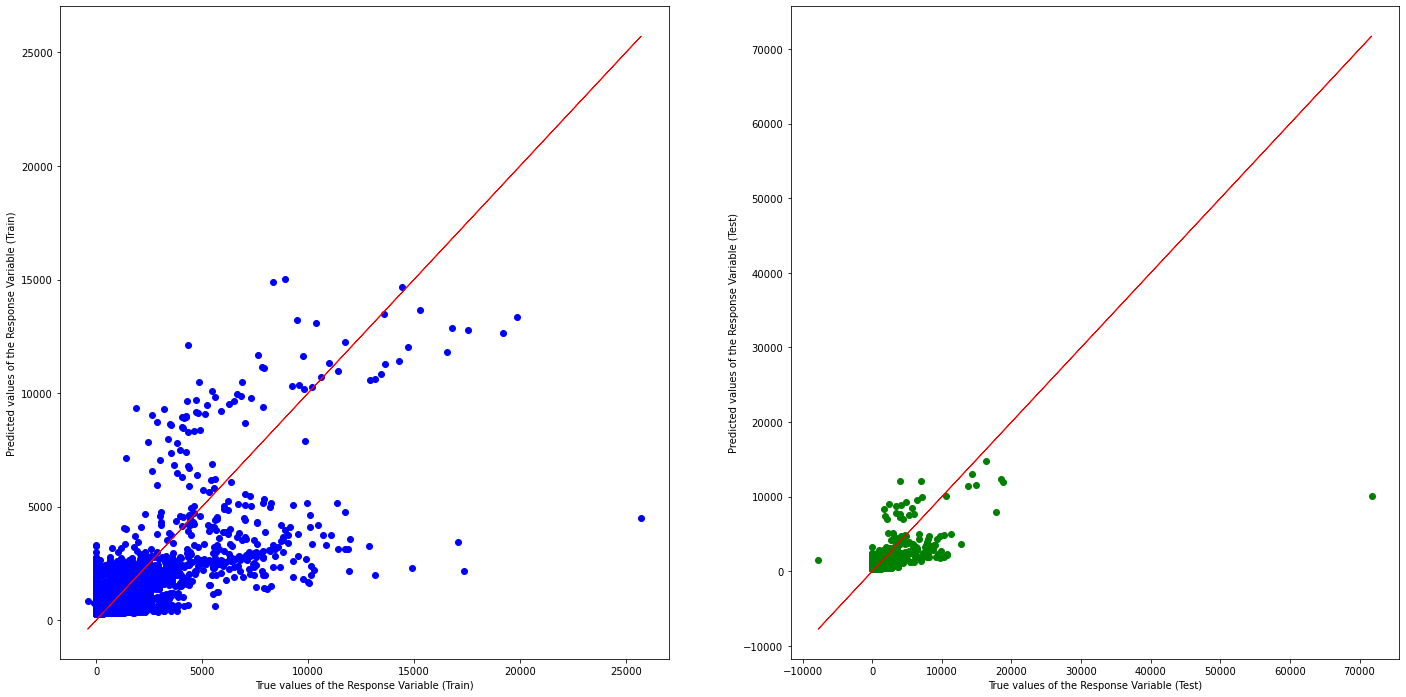

In [18]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

positiveincrease = pd.DataFrame((variables["recovered"])["positiveIncrease"]) # Response
recovered = pd.DataFrame((variables['recovered'])["recovered"]) #predictor      

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(recovered, positiveincrease, test_size = 0.25)

# Linear Regression using Train Data
linreg4 = LinearRegression()         # create the linear regression object
linreg4.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg4.intercept_)
print('Coefficients of Regression \t: a = ', linreg4.coef_)
print()

# Predict Total values corresponding to HP
y_train_pred = linreg4.predict(X_train)
y_test_pred = linreg4.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg4.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg4.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

Intercept of Regression 	: b =  [207.81207685]
Coefficients of Regression 	: a =  [[0.05839691]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.4879912982021767
Mean Squared Error (MSE) 	: 2780659.6126982835

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.5552832276338395
Mean Squared Error (MSE) 	: 1979508.8199235117



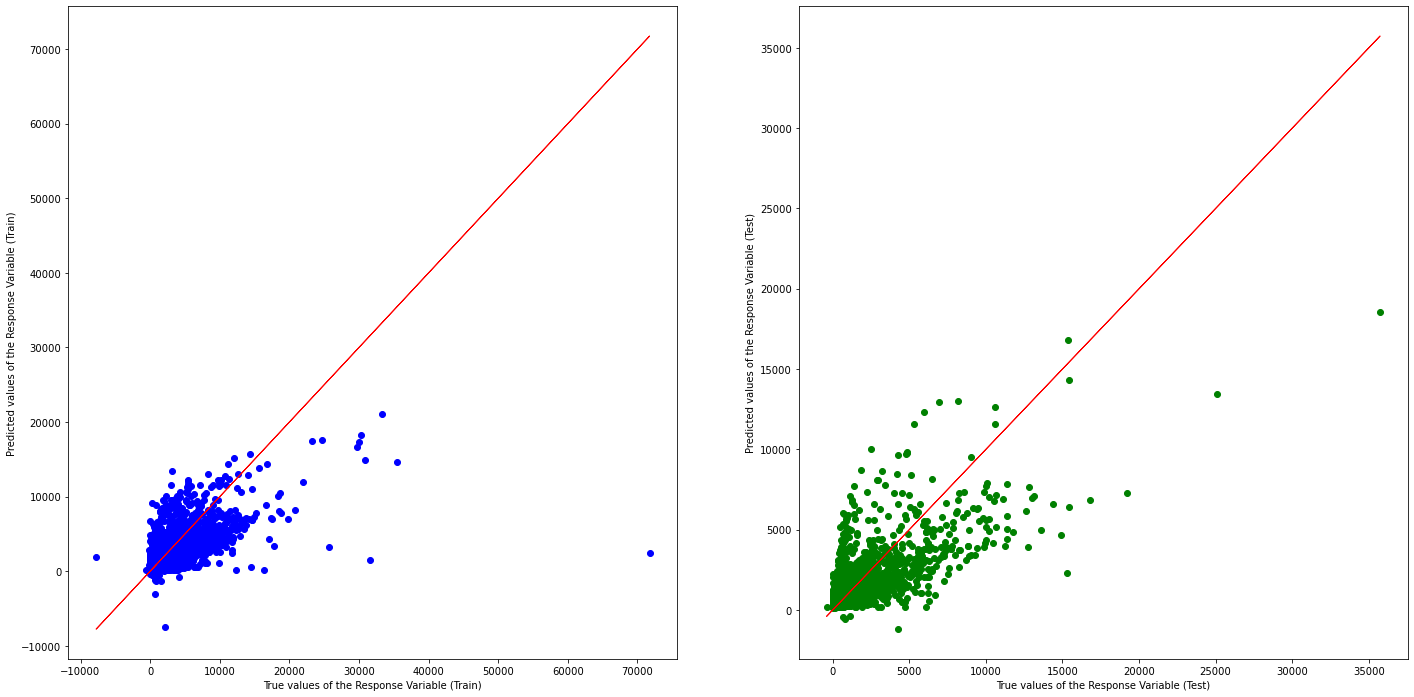

In [19]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

positiveincrease = pd.DataFrame((variables["totalTestResultsIncrease"])["positiveIncrease"]) # Response
totaltestresultsincrease = pd.DataFrame((variables['totalTestResultsIncrease'])["totalTestResultsIncrease"]) #predictor      

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(totaltestresultsincrease, positiveincrease, test_size = 0.25)

# Linear Regression using Train Data
linreg5 = LinearRegression()         # create the linear regression object
linreg5.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg5.intercept_)
print('Coefficients of Regression \t: a = ', linreg5.coef_)
print()

# Predict Total values corresponding to HP
y_train_pred = linreg5.predict(X_train)
y_test_pred = linreg5.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg5.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg5.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

## Deciding which model is the best
Based on the above 5 models, the first linereg model (predictor: hospitalizedCurrently ) tend to have higher explained variance values for both the train and test datasets. Hence, hospitalizedCurrently is the best predictor to predict positiveIncrease. Now we will proceed to use this model to help predict positiveIncrease in other countries.

In [20]:
s = pd.read_csv("owid-covid-data.csv") #using external source of data for covid cases in other countries
countries = list(s["location"].unique())

### Applying our model on other countries 
The code below helps to generate lin reg models on other countries and see which countries manage to have explained variance values more than a value of 0.6. As you can see based on the explained variance values, the model worked quite a few countries such as Croatia, Austria, Portugal, Slovenia..... The model that was applied on this countries had a generally high explained variance value.

Austria
----------
Austria
Explained Variance (R^2) 	: 0.7401549134671196
Mean Squared Error (MSE) 	: 1167165.2991612856
----------
Belgium
Bulgaria
Canada
Croatia
----------
Croatia
Explained Variance (R^2) 	: 0.8519889098849828
Mean Squared Error (MSE) 	: 219306.19703851588
----------
Cyprus
Czechia
----------
Czechia
Explained Variance (R^2) 	: 0.6742510277151263
Mean Squared Error (MSE) 	: 4770738.101173732
----------
Denmark
Estonia
Finland
France
Hungary
Iceland
Ireland
Israel
Italy
Latvia
Lithuania
Luxembourg
Netherlands
Norway
Poland
Portugal
----------
Portugal
Explained Variance (R^2) 	: 0.7599748239558388
Mean Squared Error (MSE) 	: 877502.8723721093
----------
Slovakia
----------
Slovakia
Explained Variance (R^2) 	: 0.6531846783227941
Mean Squared Error (MSE) 	: 272161.6781747796
----------
Slovenia
----------
Slovenia
Explained Variance (R^2) 	: 0.6976809943326372
Mean Squared Error (MSE) 	: 139370.30187428137
----------
Spain
Sweden
United Kingdom
United States


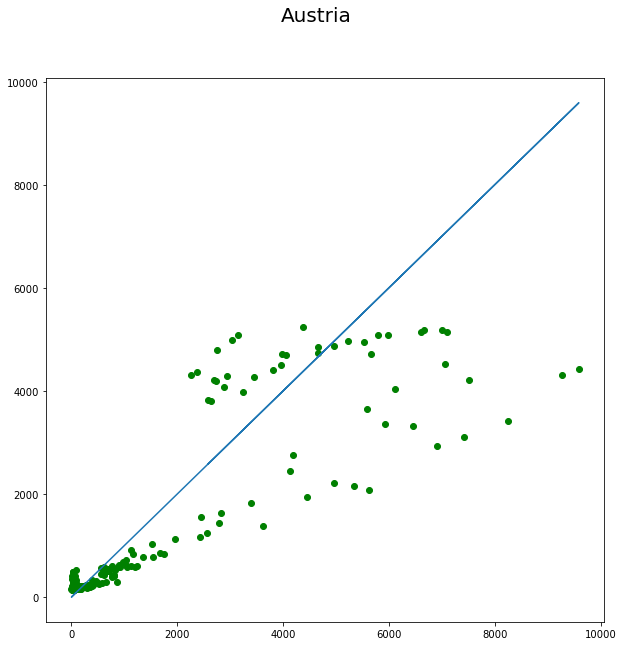

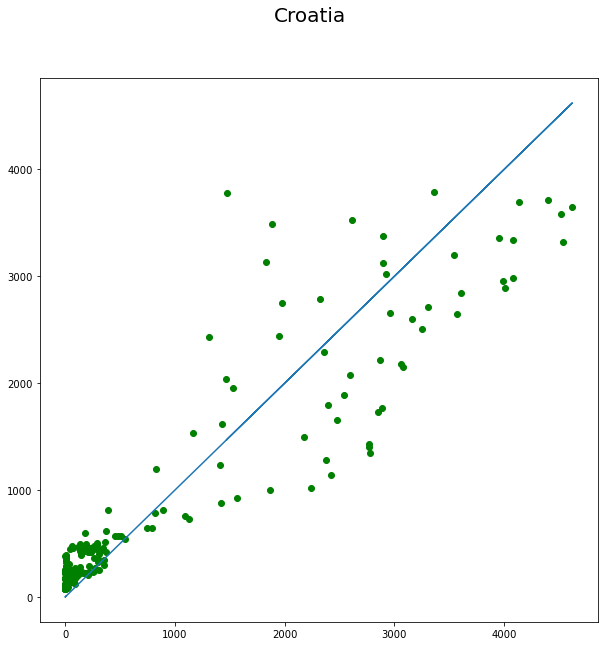

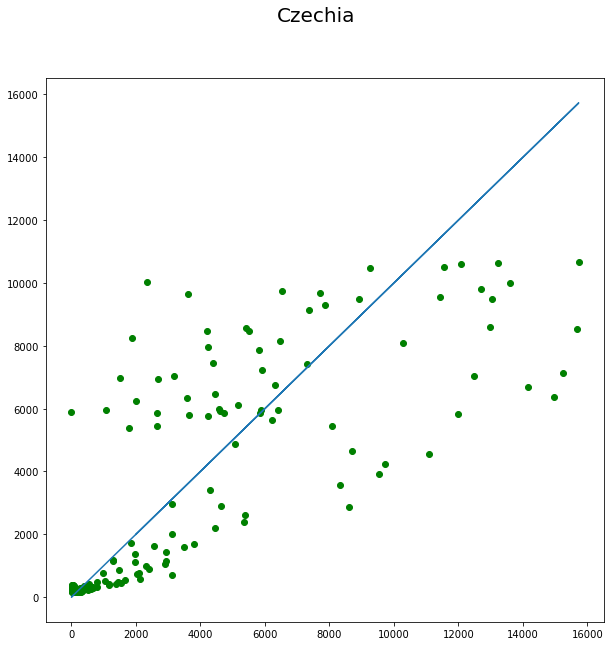

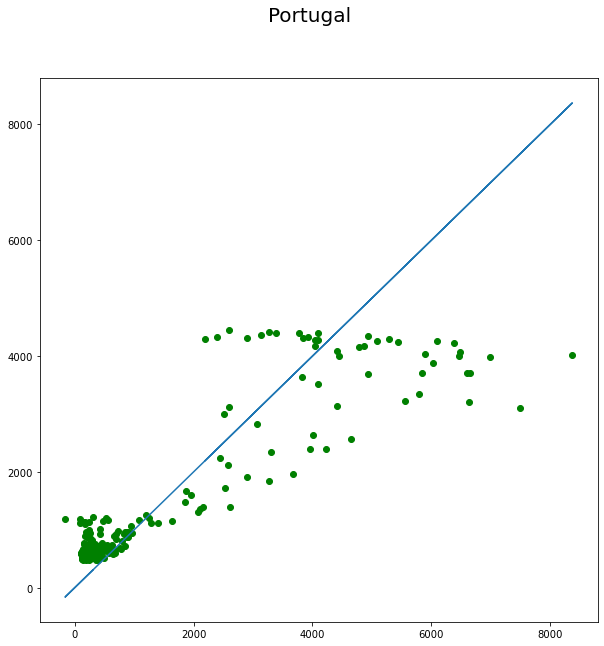

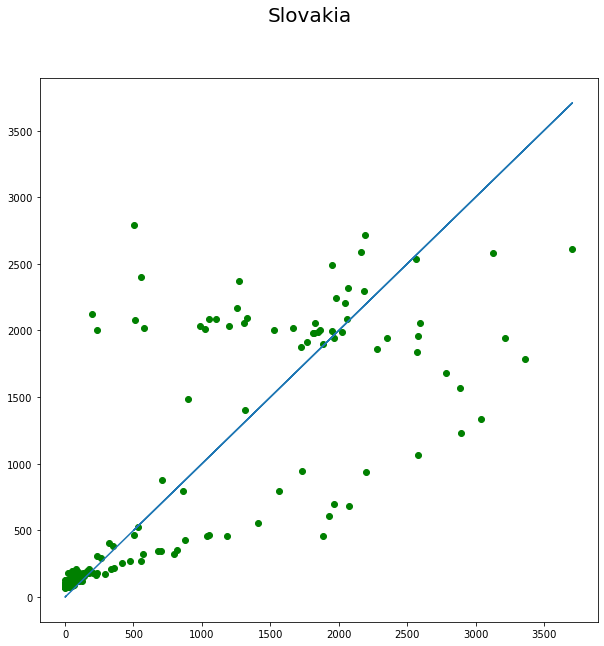

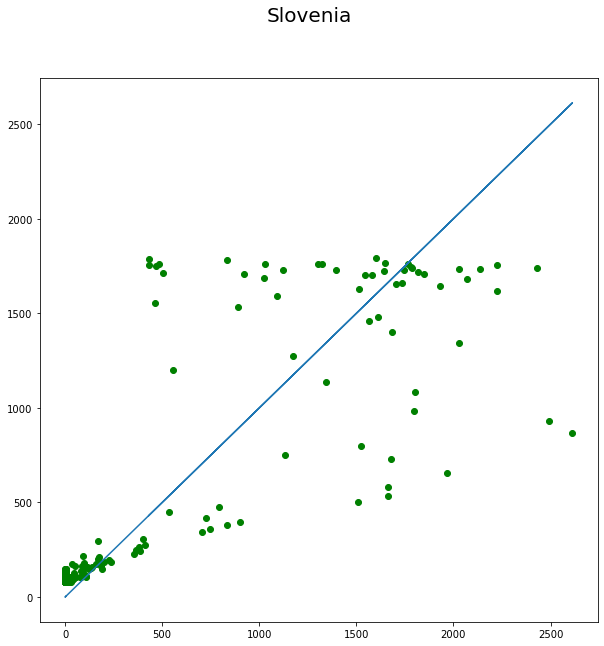

In [21]:
# This helps to generate lin reg models on other countries and see which countries manage to have explained variance values more than
# a value of 0.6. As you can see based on the explained variance values, the model worked quite a few countries such as Croatia
# Austria, Portugal, Slovenia..... The model that was applied on this countries had a generally high explained variance value.
for i in countries:
    x = s
    x = x[x["location"] == i ]
    x = x["2020-05-01" <= x["date"]]
    x = x["2020-12-14" >= x["date"]]
    if len(x[x["hosp_patients"].isnull() == False]) == 0 :
        continue
    if len(x[x["new_cases"].isnull() == False]) == 0:
        continue  
    print(i)
    x = x[["hosp_patients", "new_cases"]]
    x = x[x["hosp_patients"].isnull() == False]
    x = x[x["new_cases"].isnull() == False]
    xx_test = pd.DataFrame(x["hosp_patients"]) # our predictor
    yy_test = pd.DataFrame(x["new_cases"]) # our response : positiveIncrease
    y_test_pred = linreg.predict(xx_test)
    ex = linreg.score(xx_test, yy_test)
    country = i
    if (ex > 0.65):
        print("----------")
        print(i)
        print("Explained Variance (R^2) \t:", linreg.score(xx_test, yy_test))
        print("Mean Squared Error (MSE) \t:", mean_squared_error(yy_test, y_test_pred))
        print("----------")
        figure = plt.figure(figsize = (10,10))
        plt.plot(yy_test,yy_test)
        plt.scatter(yy_test, y_test_pred, color = "green")
        figure.suptitle(i, fontsize=20)
        


Explained Variance (R^2) 	: 0.8519889098849828
Mean Squared Error (MSE) 	: 219306.19703851588


Text(0.5, 0.98, 'Croatia')

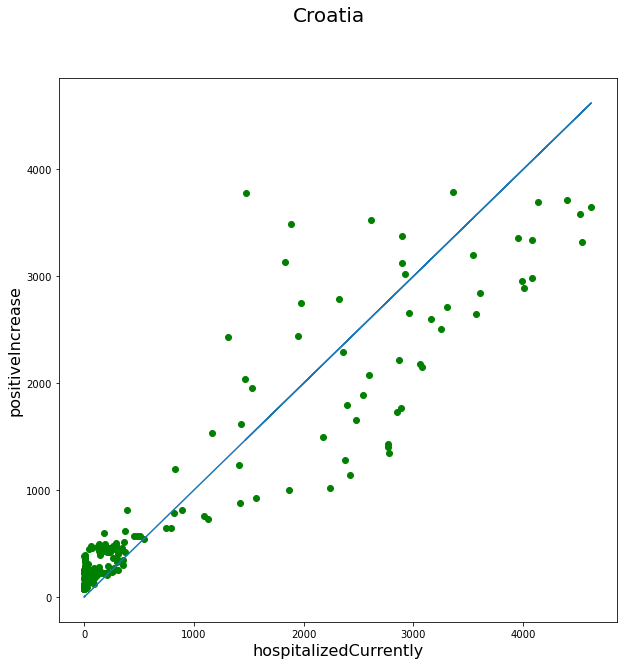

In [22]:
# Croatia Case
x = s
i = "Croatia"
x = x[x["location"] == i ]
x = x["2020-05-01" <= x["date"]]
x = x["2020-12-14" >= x["date"]]

x = x[["hosp_patients", "new_cases"]]
x = x[x["hosp_patients"].isnull() == False]
x = x[x["new_cases"].isnull() == False]
xx_test = pd.DataFrame(x["hosp_patients"]) # our predictor
yy_test = pd.DataFrame(x["new_cases"]) # our response : positiveIncrease
y_test_pred = linreg.predict(xx_test)
ex = linreg.score(xx_test, yy_test)

print("Explained Variance (R^2) \t:", linreg.score(xx_test, yy_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(yy_test, y_test_pred))
figure = plt.figure(figsize = (10,10))
plt.plot(yy_test,yy_test)
plt.xlabel('hospitalizedCurrently', fontsize=16) # hosp_patients is the same as hospitalsiedCurrently
plt.ylabel('positiveIncrease', fontsize=16) #new cases is the same as positiveIncrease
plt.scatter(yy_test, y_test_pred, color = "green")
figure.suptitle(i, fontsize=20)